In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


from ml_statistical_features import load_data_as_dataframe
from data_preparation import Data
import utils

plt.rcParams.update(utils.get_plt_settings())

save=False

In [2]:
def print_3bpm_coverage(data):
    all_data_3bpm = len(data[data['abs_err'] < 3])
    all_data = len(data.index)
    data_inf = data[data['informative']]
    inf_data_3bpm = len(data_inf[data_inf['abs_err'] < 3])
    print("3pm coverage auf allen Segmenten: %.2f" % (100/all_data * all_data_3bpm))
    print("3pm coverage auf informativen Segmenten: %.2f" % (100/len(data_inf.index) * inf_data_3bpm))

In [3]:
def bland_altman_plot(data1, data2):
    data1  = np.asarray(data1) 
    data2  = np.asarray(data2) 
    mean  = np.mean([data1, data2], axis=0) 
    diff  = data1 - data2     # Difference between data1 and data2 
    md  = np.mean(diff)     # Mean of the difference 
    sd  = np.std(diff, axis=0)   # Standard deviation of the difference
    
    plt.figure(figsize=(utils.get_plt_big_size()))

    plt.scatter(mean, diff, s=1.0) 
    plt.axhline(md,   color='gray', linestyle='--') 
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--') 
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.xlabel("$0.5 * (hr\\textsubscript{ECG} + hr\\textsubscript{BCG})$")
    plt.ylabel("$ecg_hr - bcg_hr$")

In [4]:
def print_5bpm_coverage(data):
    all_data_5bpm = len(data[data['abs_err'] < 5])
    all_data = len(data.index)
    data_inf = data[data['informative']]
    inf_data_5bpm = len(data_inf[data_inf['abs_err'] < 5])
    print("5pm coverage auf allen Segmenten: %.2f" % (100/all_data * all_data_5bpm))
    print("5pm coverage auf informativen Segmenten: %.2f" % (100/len(data_inf.index) * inf_data_5bpm))

In [5]:
def print_hr_stats(data):
    print("Durchschnittliche Herzrate nach BKG: ", data['bcg_hr'].median())
    
    inf_data = data[data['informative']]
    print("Durchschnittliche Herzrate nach BKG bei informativen Segmenten: %.2f bpm" % inf_data['bcg_hr'].mean())
    print("Durchschnittliche Herzrate nach EKG bei informativen Segmenten: %.2f bpm" % inf_data['ecg_hr'].mean())
    print("Durchschnittliche absolute Abweichung bei informativen Segmenten: %.2f bpm" % inf_data['abs_err'].mean())
    print("Durchschnittliche relative Abweichung bei informativen Segmenten: %.2f" % inf_data['rel_err'].mean(), "%")
    

    print("Durchschnittliche Herzrate nach EKG: %.2f bpm" % data['ecg_hr'].mean())

In [6]:
def print_distribution_stats(data):
    count_overall = len(data.index)
    count_informativ = len(data[data['informative']])
    percentage_informative = count_informativ/count_overall*100
    percentage_non_informative = 100 - percentage_informative
    print("insgesamt: %i, informativ: %.2f %s, nicht informativ: %.2f %s" % (count_overall, percentage_informative, "%", percentage_non_informative, "%"))
    return percentage_informative, percentage_non_informative

# 10 % / 5 bpm

In [7]:
data_10 = pd.read_csv(utils.get_features_csv_path(segment_length=10, overlap_amount=0, hr_threshold=10, data_folder='data_healthy'), index_col=False)

In [9]:
data_10.columns

Index(['brueser_sqi', 'patient_id', 'informative', 'ecg_hr', 'bcg_hr',
       'abs_err', 'rel_err', 'quality_class', 'error', 'brueser_coverage'],
      dtype='object')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


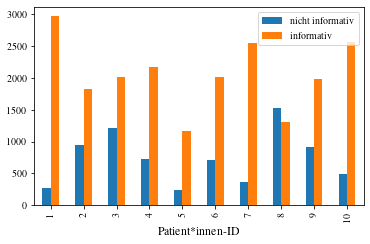

In [10]:
pd.crosstab(data_10['patient_id'],data_10['informative']).plot.bar(figsize=utils.get_plt_big_size())
plt.xlabel("Patient*innen-ID")
plt.legend(['nicht informativ', 'informativ'])
if save:
    plt.savefig(os.path.join(utils.get_thesis_pic_path(),'data-stats-10.pdf'), bbox_inches='tight', transparent=True, dpi=300)


<ipython-input-18-28d0cd9b561b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = temp[data_10['informative']]


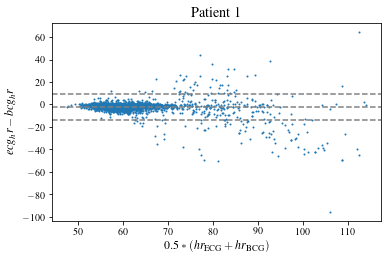

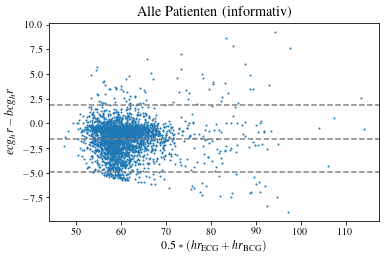

In [18]:
temp = data_10[data_10['patient_id']==1].copy()
temp = temp.replace([np.inf, -np.inf], np.nan).dropna()
bland_altman_plot(temp['ecg_hr'], temp['bcg_hr'])
plt.title("Patient 1")
temp = temp[data_10['informative']]
bland_altman_plot(temp['ecg_hr'], temp['bcg_hr'])
plt.title("Alle Patienten (informativ)")
plt.show()

In [12]:
print_distribution_stats(data_10)

insgesamt: 27933, informativ: 73.57 %, nicht informativ: 26.43 %


(73.5688970035442, 26.431102996455806)

In [13]:
print_3bpm_coverage(data_10)

3pm coverage auf allen Segmenten: 59.57
3pm coverage auf informativen Segmenten: 80.97


In [14]:
print_5bpm_coverage(data_10)

5pm coverage auf allen Segmenten: 70.59
5pm coverage auf informativen Segmenten: 95.95


In [15]:
print_hr_stats(data_10)

Durchschnittliche Herzrate nach BKG:  60.07518796992481
Durchschnittliche Herzrate nach BKG bei informativen Segmenten: 59.17 bpm
Durchschnittliche Herzrate nach EKG bei informativen Segmenten: 58.29 bpm
Durchschnittliche absolute Abweichung bei informativen Segmenten: 1.76 bpm
Durchschnittliche relative Abweichung bei informativen Segmenten: 3.01 %
Durchschnittliche Herzrate nach EKG: 59.66 bpm
